## Name: Hruday Vuppala
## Email: hvuppala@usc.edu
## USC ID: 9339727096
## HW2: Combined Cycle Power Plant Data Set

### 1 (a) Downloading the dataset

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', header=0)

In [7]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### 1(b) Exploring the data

1 (b) i

In [8]:
print('The number of rows and columns in the DataFrame are ',df.shape, 'respectively')
print('The dataset contains 5 columns, 4 represent the hourly average ambient variables Temperature(T), Ambient Pressure(AP), Relative Humidity(RH), ')
print('Exhaust Vaccuum(EV), and the 5th column is the net hourly electrical energy output of the plant.')
print('Each row represents a single hourly observation, containing the measurements of the ambient variables and the corresponding energy output for the specific hour')

The number of rows and columns in the DataFrame are  (9568, 5) respectively
The dataset contains 5 columns, 4 represent the hourly average ambient variables Temperature(T), Ambient Pressure(AP), Relative Humidity(RH), 
Exhaust Vaccuum(EV), and the 5th column is the net hourly electrical energy output of the plant.
Each row represents a single hourly observation, containing the measurements of the ambient variables and the corresponding energy output for the specific hour


1 (b) ii Pairwise scatter plots

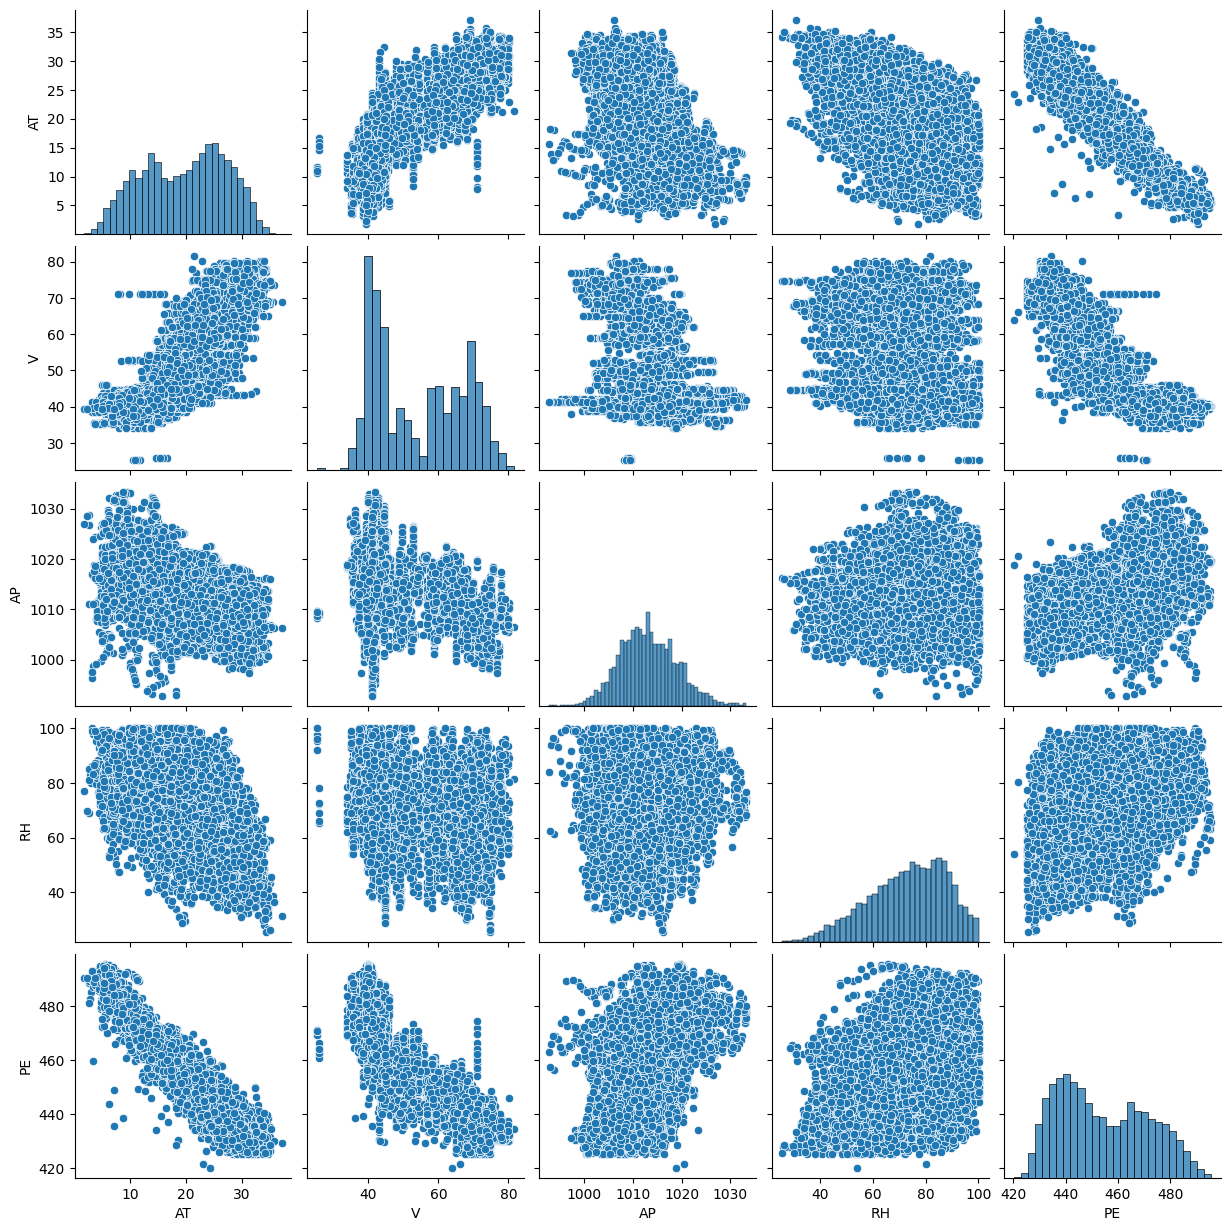

In [9]:
sns.pairplot(df)

In [10]:
print('The Ambient Pressure and the Energy Output seem to be normally distributed, while the Temperature and Exhaust Vacuum seem to be distributed')
print(' more uniformly. Also, Temperature and Exhaust Vaccuum appear to be inversely proportional to Energy Output, (i.e) Energy Output seems')
print('to be decreasing when these variable go higher.')

The Ambient Pressure and the Energy Output seem to be normally distributed, while the Temperature and Exhaust Vacuum seem to be distributed
 more uniformly. Also, Temperature and Exhaust Vaccuum appear to be inversely proportional to Energy Output, (i.e) Energy Output seems
to be decreasing when these variable go higher.


1 (b) iii Mean, Median, Range, First and Third Quartiles and Inter-quartile range

References : 
(1)https://datagy.io/pandas-iqr/
(2)https://www.statology.org/pandas-mean-median-mode/

In [11]:
df_stats = pd.DataFrame({
    'means' : [],
    'medians' : [],
    'ranges' : [],
    'first_quartile' : [],
    'third_quartile' : [],
    'iqr' : []
})

df_stats['means'] = df.mean()
df_stats['medians'] = df.median()
df_stats['ranges'] = df.max() - df.min()
df_stats['first_quartile'] = df.quantile(0.25)
df_stats['third_quartile'] = df.quantile(0.75)
df_stats['iqr'] = df.quantile(0.75) - df.quantile(0.25)

In [12]:
df_stats

,means,medians,ranges,first_quartile,third_quartile,iqr
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### 1 (c) Simple linear regression model for each of the predictors

Describing results for each simple linear regression function 

Reference : https://www.statsmodels.org/stable/regression.html

In [13]:
df_simplereg = pd.DataFrame({
    'Predictor' : [],
    'R-squared' : [],
    'Slope/Coefficient' : [],
    'Intercept' : [],
    'P-value' : []
})

def simple_regfunc(x, y):
    x = sm.add_constant(x)
    simple_reg = sm.OLS(y, x)
    results = simple_reg.fit()
    r_squared = results.rsquared          
    slope = results.params[predictor]          
    intercept = results.params['const']   
    p_value = results.pvalues[predictor]
    return r_squared, slope, intercept, p_value

for predictor in df.columns:
    if predictor != 'PE':
        x_pass = df[[predictor]]
        y_pass = df['PE']
        r_squared, slope, intercept, p_value = simple_regfunc(x_pass, y_pass)
        concat_row = pd.DataFrame({
            'Predictor' : [predictor],
            'R-squared' : [r_squared],
            'Slope/Coefficient' : [slope],
            'Intercept' : [intercept],
            'P-value' : [p_value]
        })
        df_simplereg = pd.concat([df_simplereg, concat_row])

In [14]:
df_simplereg

,Predictor,R-squared,Slope/Coefficient,Intercept,P-value
0,AT,0.898948,-2.171320,497.034120,0.0
0,V,0.756518,-1.168135,517.801526,0.0
0,AP,0.268769,1.489872,-1055.260989,0.0
0,RH,0.151939,0.455650,420.961766,0.0


From the values in the above table, we can make the following assertions:\
    > From the p-value of each predictor, we can say that all the variables are statistically significant, since p< 0.05.\
    > From the r-squared value of each predictor, we can say that AT and V, with high R-squared values, better explain the variability in the target variable, than compared to AP and RH, which have low R-squared values.

Creating plots to back up assertions

Reference : https://seaborn.pydata.org/generated/seaborn.regplot.html

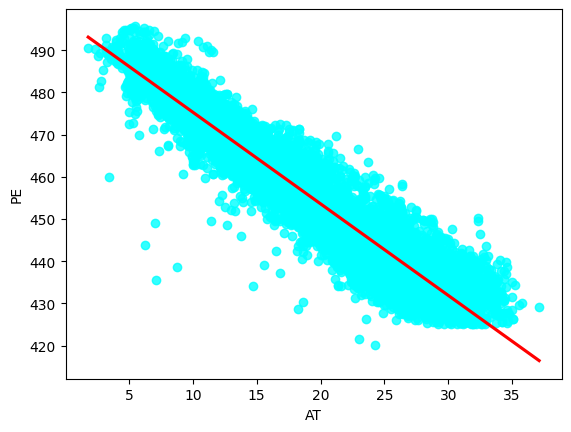

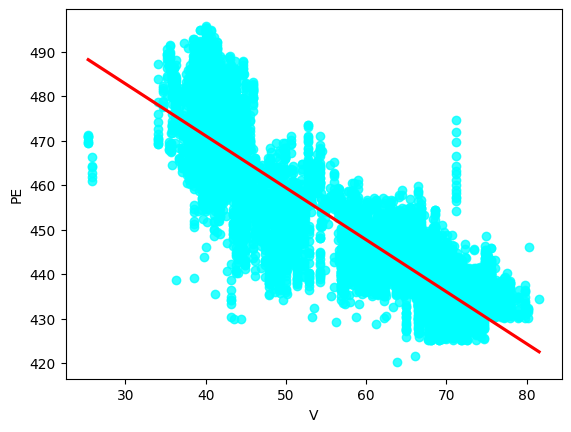

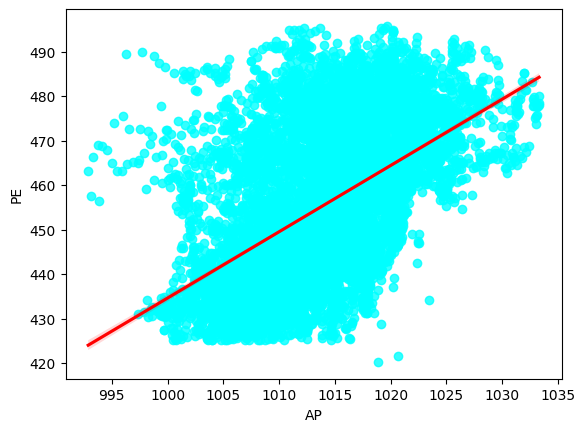

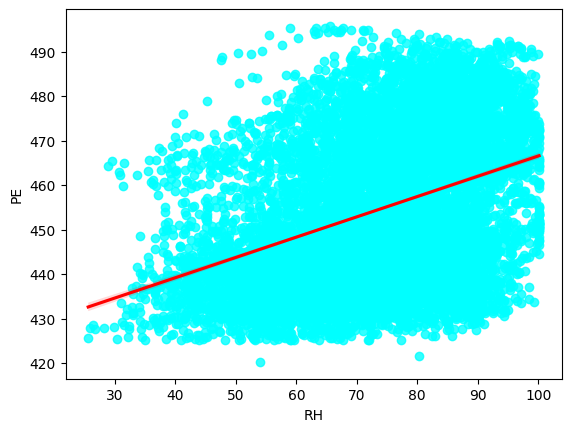

In [15]:
for column in df.columns:
    if column != 'PE':
        sns.regplot(data = df, x = column, y = 'PE', scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
        plt.show()


In the graphs (V vs PE) and (AT vs PE), the points are closer to the regression line, indicating a strong linear relationship, which was also indicated by the R-squared values.\
In the graphs (RH vs PE) and (AP vs PE), the points are very scattered, away from the regression line. This was also indicated by the low R-squared values for AP and RH.\
Hence, we can say that the plots strongly back our assertions.

Checking for outliers

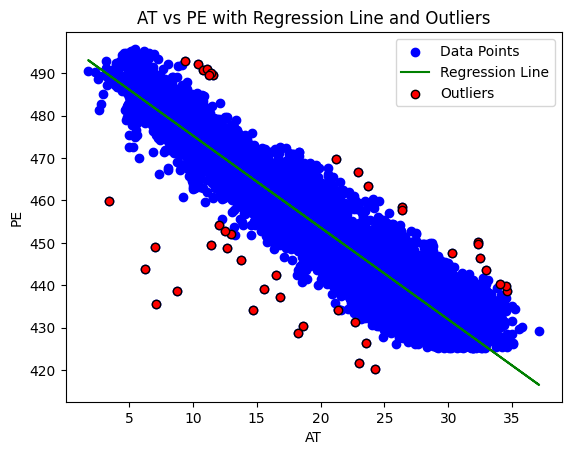

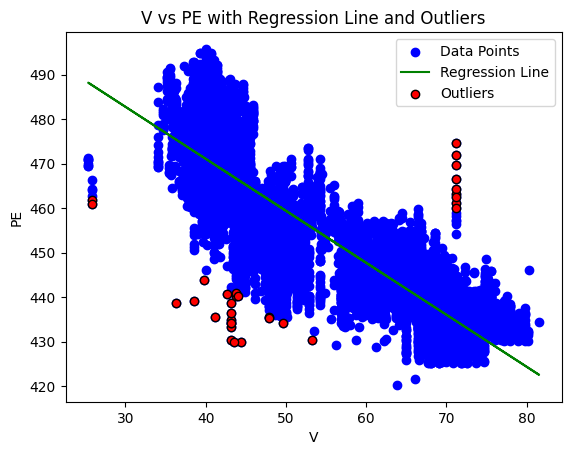

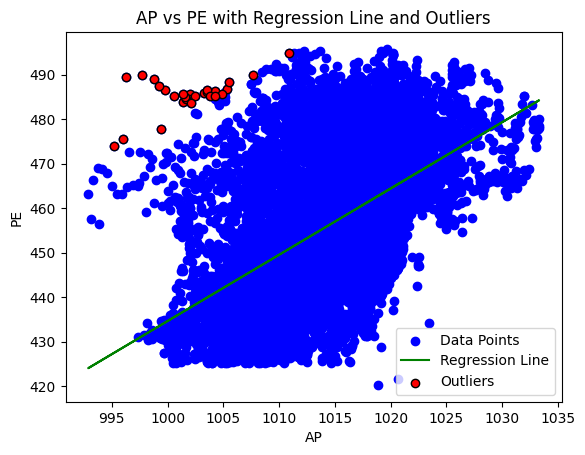

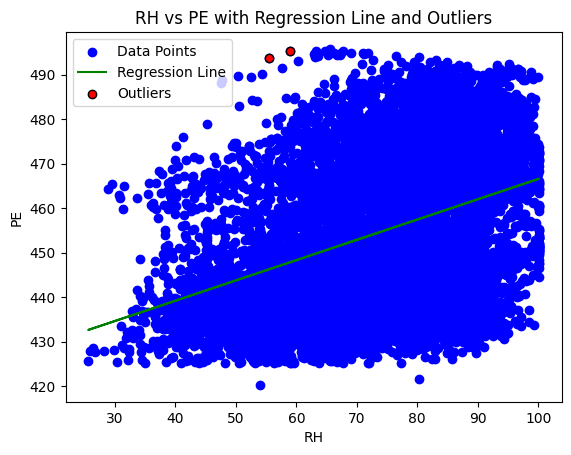

The percentage of outliers for each plot are ['AT: 0.44%', 'V: 0.34%', 'AP: 0.29%', 'RH: 0.02%']


In [16]:
outliers_percentage = []

def identify_outliers(x, y, predictor):
    x_const = sm.add_constant(x)
    simple_reg = sm.OLS(y, x_const)
    results = simple_reg.fit()
    predictions = results.predict(x_const)
    residuals = y - predictions
    std_residual = residuals.std()
    outlier_mask = abs(residuals) > 3 * std_residual
    num_outliers = outlier_mask.sum()
    percentage_outliers = (num_outliers / len(y)) * 100
    return predictions, residuals, x[outlier_mask], y[outlier_mask], percentage_outliers

for predictor in df.columns:
    if predictor != 'PE':
        x_pass = df[[predictor]]
        y_pass = df['PE']
        predictions, residuals, outlier_x, outlier_y, percentage_outliers = identify_outliers(x_pass, y_pass, predictor)
        outliers_percentage.append(f'{predictor}: {percentage_outliers:.2f}%')
        
        plt.scatter(x_pass, y_pass, label='Data Points', color='blue')
        plt.plot(x_pass, predictions, color='green', label='Regression Line')
        plt.scatter(outlier_x, outlier_y, color='red', label='Outliers', edgecolor='black')
        plt.title(f'{predictor} vs PE with Regression Line and Outliers')
        plt.xlabel(predictor)
        plt.ylabel('PE')
        plt.legend()
        plt.show()

print('The percentage of outliers for each plot are',outliers_percentage)


The percentage of outliers is very low when the threshold is set to be 3 times the standard variance of the residuals

### 1(d) Fitting a multiple linear regression model for prediction

In [17]:
df_x = df.drop(columns=['PE'])
df_y = df['PE']
df_x = sm.add_constant(df_x)
multi_reg = sm.OLS(df_y, df_x)
results = multi_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:25:07   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
print('The p-values for the variables AT, V, AP, RH respectively are ', results.pvalues['AT'],',', results.pvalues['V'],',', results.pvalues['AP'],',', results.pvalues['RH'])
print('Since the p-values for all the predictors are less than 0.05, we can reject the null hypothesis for all of them')

The p-values for the variables AT, V, AP, RH respectively are  0.0 , 4.375305362526256e-215 , 5.5071088524992333e-11 , 3.1045844202903505e-293
Since the p-values for all the predictors are less than 0.05, we can reject the null hypothesis for all of them


### 1(e) Comparing results from 1 (c) and 1 (d)

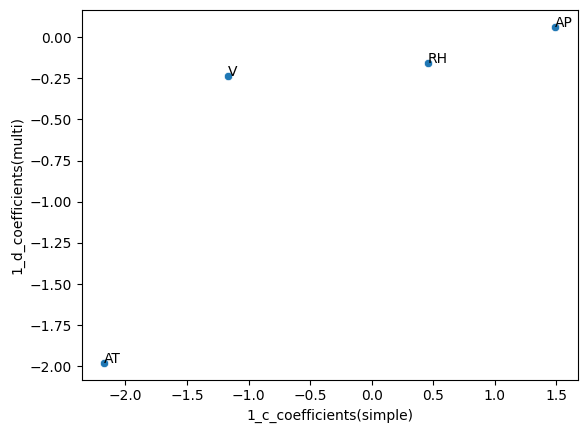

In [19]:
df_compare = pd.DataFrame({
    'Predictors' : ['AT', 'V', 'AP', 'RH'],
    '1_c_coefficients(simple)' : np.array(df_simplereg['Slope/Coefficient']),
    '1_d_coefficients(multi)' : np.array(results.params[1:5])
})

sns.scatterplot(data = df_compare, x = df_compare['1_c_coefficients(simple)'], y = df_compare['1_d_coefficients(multi)'])
for i, row in df_compare.iterrows():
    plt.text(row['1_c_coefficients(simple)'], row['1_d_coefficients(multi)'], row['Predictors'])
plt.show()

### 1(f) Checking for non-linear association between any of the predictors and the response

In [20]:
df_nonlin = pd.DataFrame({
    'Predictor' : [],
    'Intercept' : [],
    'Degree 1' : [],
    'Degree 2' : [],
    'Degree 3' : []
})

def poly_reg_func(x,y):
    poly = PolynomialFeatures(degree = 3)
    poly_x = poly.fit_transform(x)

    poly_x = sm.add_constant(poly_x)
    model = sm.OLS(y, poly_x).fit()
    return model.params, model.pvalues

for predictor in df.columns:
    if predictor != 'PE':
        x_pass = df[[predictor]]
        y_pass = df['PE']
        coeffs, pvalues = poly_reg_func(x_pass, y_pass)
        df_concat = pd.DataFrame({
            'Predictor' : [predictor],
            'Intercept' : [coeffs.iloc[0]],
            'Degree 1' : [coeffs.iloc[1]],
            'Degree 2' : [coeffs.iloc[2]],
            'Degree 3' : [coeffs.iloc[3]],
            'P values' : [pvalues.iloc[1].round(4)]
        })
        df_nonlin = pd.concat([df_nonlin, df_concat], ignore_index = True)

df_nonlin

,Predictor,Intercept,Degree 1,Degree 2,Degree 3,P values
0,AT,492.728143,-0.610346,-0.125138,0.002675,0.0000
1,V,554.146849,-2.144377,-0.002712,0.000134,0.0000
2,AP,0.074694,25.255593,-0.049952,0.000025,0.0000
3,RH,468.413536,-1.729211,0.032145,-0.000152,0.0004


Based on the p values of the coefficients after performing linear regression, we can observe that even though the coefficients for higher degrees are very small, the p values are less than 0.05, so we can ignore the null hypothesis.

### 1(g) Checking for association of interactions of predictors with the response

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [21]:
x = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias= False)
poly_x = poly.fit_transform(x)
model = sm.OLS(y, poly_x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.057e+07
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:25:07   Log-Likelihood:                         -27586.
No. Observations:                9568   AIC:                                  5.519e+04
Df Residuals:                    9558   BIC:                                  5.526e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

ChatGPT prompt: How to know the order of the interaction terms generated by PolnomialFeatures function in python

Answer: You can explore the terms using the get_feature_names_out() function to see the exact order for your dataset.

In [22]:
df_signif = pd.DataFrame({
    'Interaction term' : poly.get_feature_names_out(input_features=['AT', 'V', 'AP', 'RH']),
    'P values' : model.pvalues.round(4)
})

df_signif

,Interaction term,P values
x1,AT,0.7745
x2,V,0.0011
x3,AP,0.0000
x4,RH,0.0000
x5,AT V,0.0000
x6,AT AP,0.2049
x7,AT RH,0.0000
x8,V AP,0.0063
x9,V RH,0.4080
x10,AP RH,0.0000


From the values of the coefficients above, we can say that the terms (AT|V), (AT|RH), (V|AP), (AP|RH) are statistically significant, as the p-value is less than 0.05 and the null value hypothesis can be dismissed

### 1(h) 

Basic linear regression model

In [23]:
x = df.drop('PE', axis = 1)
y = df['PE']
df_preds_errors = pd.DataFrame({
    'Model': [],
    'Train MSE' : [],
    'Test MSE' : []
})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train_const = sm.add_constant(x_train)
linreg_basic = sm.OLS(y_train, x_train_const).fit()

x_test_const = sm.add_constant(x_test)
train_preds = linreg_basic.predict(x_train_const)
mse_train_basic = mean_squared_error(y_train, train_preds)
test_preds = linreg_basic.predict(x_test_const)
mse_test_basic = mean_squared_error(y_test, test_preds)
new_row = pd.DataFrame({'Model': ['Basic'], 'Test MSE': [mse_test_basic], 'Train MSE': [mse_train_basic]})
df_preds_errors = pd.concat([df_preds_errors, new_row], ignore_index=True)

Regression model involving all possible interaction terms and quadratic non linearities

In [24]:
from itertools import combinations
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

x_train_poly_const = sm.add_constant(x_train_poly)
model = sm.OLS(y_train, x_train_poly_const).fit()

significant_terms_mask = model.pvalues < 0.05
feature_names = poly.get_feature_names_out(input_features=x.columns)

significant_features = set(np.where(significant_terms_mask)[0])
interaction_terms = [feature for feature in feature_names if " " in feature]

for term in interaction_terms:
    parents = term.split(" ")
    parent_indices = [np.where(feature_names == parent)[0][0] for parent in parents]
    interaction_index = np.where(feature_names == term)[0][0]
    if interaction_index in significant_features:
        significant_features.update(parent_indices)

x_train_significant = x_train_poly_const[:, list(significant_features)]
x_test_significant = sm.add_constant(x_test_poly)[:, list(significant_features)]

model_significant = sm.OLS(y_train, x_train_significant).fit()

train_preds_significant = model_significant.predict(x_train_significant)
test_preds_significant = model_significant.predict(x_test_significant)

mse_train_significant = mean_squared_error(y_train, train_preds_significant)
mse_test_significant = mean_squared_error(y_test, test_preds_significant)

new_row = pd.DataFrame({
    'Model': ['Significant'],
    'Train MSE': [mse_train_significant],
    'Test MSE': [mse_test_significant]
})

df_preds_errors = pd.concat([df_preds_errors, new_row], ignore_index=True)


In [25]:
df_preds_errors

,Model,Train MSE,Test MSE
0,Basic,20.766120,20.777478
1,Significant,18.093236,18.263588


### 1(i) KNN Regression

In [26]:
k_values = np.arange(1, 101, 1)
test_errors_raw = []
train_errors_raw = []
test_errors_norm = []
train_errors_norm = []

x = df.drop('PE', axis=1)
y = df['PE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(x_train, y_train)
    y_train_preds_raw = knn_raw.predict(x_train)
    y_test_preds_raw = knn_raw.predict(x_test)
    train_errors_raw.append(mean_squared_error(y_train, y_train_preds_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_preds_raw))

    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_norm.fit(x_train_norm, y_train)
    y_train_preds_norm = knn_norm.predict(x_train_norm)
    y_test_preds_norm = knn_norm.predict(x_test_norm)
    train_errors_norm.append(mean_squared_error(y_train, y_train_preds_norm))
    test_errors_norm.append(mean_squared_error(y_test, y_test_preds_norm))
    

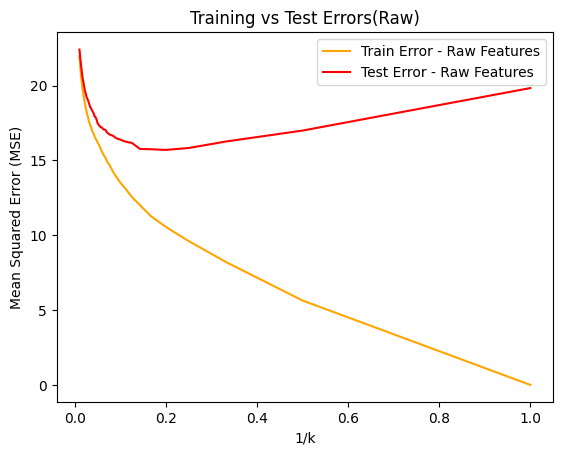

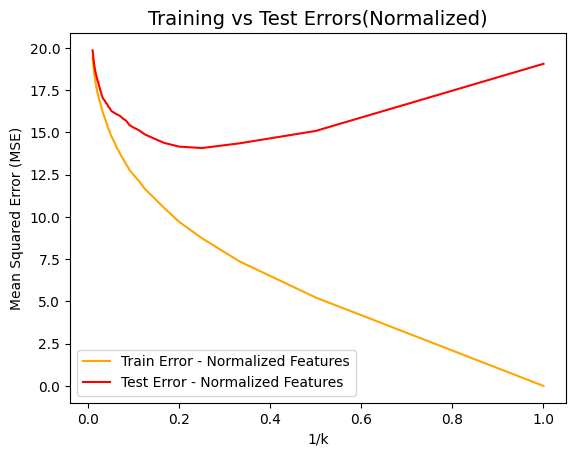

In [27]:
k_inverse = (1/k_values).round(3)

sns.lineplot(x=k_inverse, y=train_errors_raw, label='Train Error - Raw Features', color='orange')
sns.lineplot(x=k_inverse, y=test_errors_raw, label='Test Error - Raw Features', color='red')
plt.title('Training vs Test Errors(Raw)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

sns.lineplot(x=k_inverse, y=train_errors_norm, label='Train Error - Normalized Features', color='orange')
sns.lineplot(x=k_inverse, y=test_errors_norm, label='Test Error - Normalized Features', color='red')
plt.title('Training vs Test Errors(Normalized)', fontsize=14)
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

### 1 (j) Comparing results of KNN with Linear Regression

In [28]:
print('The minimum error encountered using raw values in KNN is',min(test_errors_raw))
print('The minimum error encountered using normalized values in KNN is', min(test_errors_norm))

The minimum error encountered using raw values in KNN is 15.704821203761764
The minimum error encountered using normalized values in KNN is 14.070606067136888


In [29]:
print('The minimum errors encountered using Linear regression with basic predictors, interaction variables with quadratic non linearities respectively are', df_preds_errors['Test MSE'].to_string(index=False))

The minimum errors encountered using Linear regression with basic predictors, interaction variables with quadratic non linearities respectively are 20.777478
18.263588


### 2 ISLR 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.\

(a) The sample size n is extremely large, and the number of predictors p is small.\
**Answer**: When the sample size is extremely large and the number of predictors is small, flexible models tend to work better. This is because the risk of overfitting is reduced due to the large n, and due to the small p, the model can better predict data without overfitting.\

(b) The number of predictors p is extremely large, and the number of observations n is small.\
**Answer**: When p is extremely large, and the number of observations is small, the model may overfit very easily if it is flexible. Hence, inflexible models perform better.\

(c) The relationship between the predictors and response is highly non-linear.\
**Answer:** When the response is highly non linear, flexible models tend to work better because nonflexible models struggle to capture non linear relationships accurately due to their limited adaptability.\

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.\
**Answer:** When there is high variance of the error terms, flexible models tend to fit this noise, which results in overfitting. Hence, inflexible models are better when variance is extremely high.

### 3 ISLR 2.4.7

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

In [30]:
def euclid_dist(x,y):
    return np.sqrt(sum((xi - yi) ** 2 for xi, yi in zip(x, y)))

points = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
test_point = [0, 0, 0]
rows = []

for i, point in enumerate(points):
    distance = euclid_dist(point, test_point)
    rows.append({'Point Number': i + 1, 'Distance from Test Point': distance})

df_distances = pd.DataFrame(rows)
df_distances

,Point Number,Distance from Test Point
0,1,3.000000
1,2,2.000000
2,3,3.162278
3,4,2.236068
4,5,1.414214
5,6,1.732051


(b) What is our prediction with K = 1? Why?\
**Answer:** With k=1, our prediction would be 'Green', since the nearest point is (-1,0,1)\

(c) What is our prediction with K = 3? Why?\
**Answer:** With k=3, our prediction would be 'Red', since the theee nearest points are (-1,0,1),(1,1,1), and (2,0,0). Two of these points are 'Red', so through majority polling, our prediction would be 'Red'

(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?\
**Answer:** If the Bayes decision boundary is highly non-linear, we would want the model to be flexible so that it can predict better. Models with smaller k are more flexible than larger k values, which makes the model adapt to the available data more efficiently. Hence, we can expect the K value for highly non linear decision boundary would be **small**.